# Importación de librerias necesarias

In [106]:
#Inporatamos la libreria pandas
import pandas as pd 
#Inporatamos la libreria seaborn
import seaborn as sns
#Inporatamos la libreria numpy
import numpy as np
#Importamos LabelEncoder desde la libreria sklearn
from sklearn.preprocessing import LabelEncoder
#Importamos train_test_split desde la libreria sklearn
from sklearn.model_selection import train_test_split
#Importamos MinMaxScaler desde la libreria sklearn
from sklearn.preprocessing import MinMaxScaler
#Importamos la libreria matplotlib
import matplotlib.pyplot as plt
#Importamos GaussianNB desde la libreria sklearn
from sklearn.naive_bayes import GaussianNB
#Importamos Metric desde la libreria sklearn
from sklearn import metrics
#Importamos la libreria collections
import collections
#Importamos confusion_matrix desde la libreria sklearn
from sklearn.metrics import confusion_matrix
# Importamos acurracy_score desde la libreria sklearn
from sklearn.metrics import accuracy_score
#Importamos recall_score desde la libreria sklearn
from sklearn.metrics import recall_score
#Importamos precision_score desde la libreria sklearn
from sklearn.metrics import precision_score
#Importamos f1_score desde la libreria sklearn
from sklearn.metrics import f1_score
# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler
#Importamos hiden markov model desde la libreria hmmlearn
from hmmlearn import hmm
#Importamos la libreria que permite realizar el modelo Fuzzy Logic
from fcmeans import FCM

In [107]:
#Carga del dataset
df = pd.read_csv("mantenimiento.csv")

In [108]:
#Mostrar el dataset
df.head(1000)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
995,996,L48175,L,296.3,307.3,1566,35.8,175,0,No Failure
996,997,M15856,M,296.3,307.2,1286,51.1,177,0,No Failure
997,998,M15857,M,296.3,307.2,1446,45.9,180,0,No Failure
998,999,M15858,M,296.4,307.2,2071,19.4,183,0,No Failure


In [109]:
#Aplicación de la funcion describe para ver información estadística del dataset
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


**Descripción del dataset**

**->Variable Objetivo**

Failure Type: Representa el tipo de dato


**-> Variables de entrada X**
UID: identificador único que va de 1 a 10000


productID: consistente en una letra L, M o H para baja (50% de todos los productos), media (30%) y alta (20%) como variantes de 
calidad del producto y un número de serie específico de la variante


temperatura del aire [K]: generada mediante un proceso de paseo aleatorio, posteriormente normalizado con una desviación estándar de 2 K en torno a 300 K


temperatura del proceso [K]: generada mediante un proceso de paseo aleatorio normalizado a una desviación estándar de 1 K, añadida a la temperatura del aire más 10 K.


velocidad de rotación [rpm]: calculada a partir de una potencia de 2860 W, superpuesta con un ruido normalmente distribuido


par [Nm]: los valores de par se distribuyen normalmente en torno a 40 Nm con un Ïƒ = 10 Nm y sin valores negativos.


desgaste de la herramienta [min]: Las variantes de calidad H/M/L añaden 5/3/2 minutos de desgaste de la herramienta utilizada en el proceso y una etiqueta de "fallo de la máquina" que indica, si la máquina ha fallado en este punto de datos particular para cualquiera de los siguientes modos de fallo son verdaderos.

In [110]:
#Aplicación de la funció n count para ver la cantidad de registros del dataset
df.count()

UDI                        10000
Product ID                 10000
Type                       10000
Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Target                     10000
Failure Type               10000
dtype: int64

In [111]:
#Mostrar la información del nuevo dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


**Estadisticas de la variable objetivo**

In [163]:
#Código que responde a la descripción anterior
df1 = pd.DataFrame(df)
np.round(df1.describe(), 3)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,0.801,300.005,310.006,1538.776,39.987,107.951,0.034
std,2886.896,0.600,2.000,1.484,179.284,9.969,63.654,0.181
min,1.000,0.000,295.300,305.700,1168.000,3.800,0.000,0.000
25%,2500.750,0.000,298.300,308.800,1423.000,33.200,53.000,0.000
50%,5000.500,1.000,300.100,310.100,1503.000,40.100,108.000,0.000
75%,7500.250,1.000,301.500,311.100,1612.000,46.800,162.000,0.000
max,10000.000,2.000,304.500,313.800,2886.000,76.600,253.000,1.000


In [164]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Type,10000.0,0.80060,0.600230,0.0,0.00,1.0,1.00,2.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [165]:
#Reemplazar el nombre de la etiqueta
df1.rename(columns={"Target": "Objetivo"}, inplace = True)

#Estadísticas de la variable objetivo
objetivo = df1['Objetivo']
np.round(objetivo.describe(), 3)

count    10000.000
mean         0.034
std          0.181
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          1.000
Name: Objetivo, dtype: float64

# Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [166]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
cols_caract = df1.drop('Objetivo', axis=1)
var_objetivo = ['Objetivo']
X = cols_caract # caracteristicas
y = df1[var_objetivo] # target/etiquet

In [167]:
#Comprobar si existen valores nulos en la variable objetivo
y.isnull().sum()

Objetivo    0
dtype: int64

In [168]:
#Comprobar los valores nulos en datos de entrada
X.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Failure Type               0
dtype: int64

In [169]:
#Se inicia el entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape

((7000, 9), (3000, 9))

## MinMaxScaling

In [170]:
from sklearn.preprocessing import MinMaxScaler

# Instanciamos el scalar
scaler = MinMaxScaler()

# Entrenamos el modelo con los datos de entrenamiento
scaler.fit(X_train)

# Transformamos los datos de entrenamiento
X_train_scaled = scaler.transform(X_train)
# Transformamos los datos de prueba
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'H31642'

# Limpieza del dataset

In [112]:
#Aplicación de la función nunique para identificar las variable categoricas
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [113]:
#Verificamos la existencia de datos nulos
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [114]:
#Verificamos la existencia  de datos vacios (longitud = 0)
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

# Tranformación de datos categóricos a la nueva data

In [115]:
#Identificamos los valores unicos para cada categoria
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [116]:
df.replace({'M': 0, 'L': 1, 'H':2}, inplace=True)
#Sobreescribe los datos en la misma columan
df['Type'] = df['Type'].map({1: 1, 0: 0,2:2})#Sobreescribe los datos en la misma columan
df.head()#Mostramos los primero 5 datos

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,0,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,No Failure


In [117]:
X = df[['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
Y = df['Target']

In [118]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=0)#Se separa el DataFrame en una parte para entrenar y otra para testear

X_train.shape, X_test.shape

((7000, 7), (3000, 7))

In [119]:
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)#     Se aplica el escalado a los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)# Se aplica el escalado a los datos de entrenamiento y prueba

In [158]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)# Se crea un DataFrame con los datos de entrenamiento escalados 
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)# Se crea un DataFrame con los datos de prueba escalados

In [159]:
np.round(X_train.describe(), 1)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0
mean,5009.4,0.8,300.0,310.0,1538.9,40.0,107.6
std,2894.5,0.6,2.0,1.5,179.1,9.9,63.8
min,1.0,0.0,295.3,305.7,1181.0,3.8,0.0
25%,2514.8,0.0,298.3,308.8,1423.0,33.1,52.0
50%,5002.5,1.0,300.1,310.1,1504.0,40.1,107.0
75%,7522.2,1.0,301.5,311.0,1614.0,46.7,162.0
max,10000.0,2.0,304.5,313.8,2886.0,76.6,253.0


In [160]:
np.round(X_train_scaled.describe(), 1)# Muestra la descripción de los datos escalados

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0
mean,0.5,0.4,0.5,0.5,0.2,0.5,0.4
std,0.3,0.3,0.2,0.2,0.1,0.1,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.0,0.3,0.4,0.1,0.4,0.2
50%,0.5,0.5,0.5,0.5,0.2,0.5,0.4
75%,0.8,0.5,0.7,0.7,0.3,0.6,0.6
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


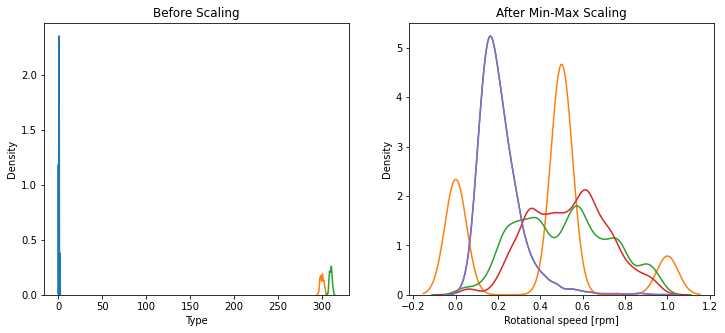

In [161]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))# Se crea una figura con dos gráficas en una misma página 


ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Type'], ax=ax1)
sns.kdeplot(X_train['Air temperature [K]'], ax=ax1)
sns.kdeplot(X_train['Process temperature [K]'], ax=ax1)
sns.kdeplot(X_train_scaled['Rotational speed [rpm]'], ax=ax2)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['Type'], ax=ax2)
sns.kdeplot(X_train_scaled['Air temperature [K]'], ax=ax2)
sns.kdeplot(X_train_scaled['Process temperature [K]'], ax=ax2)
sns.kdeplot(X_train_scaled['Rotational speed [rpm]'], ax=ax2)
plt.show()

**Aplicación de algoritmo PCA**

In [162]:
# Importamos la libreria PCA de sklearn
from sklearn.decomposition import PCA

std = StandardScaler()
# Normalizamos los datos de entrenamiento
std_X_train = std.fit_transform(X_train)

y = df["Target"]
X = df("Target", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

TypeError: 'DataFrame' object is not callable

# Preprocesamiento de los datos

In [100]:
X = df[['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
Y = df['Target']

# Estandarización de la data

Aplicación del método Min_Max Scaling 

## División del dataset en datos de entrenamiento y datos de test 

In [124]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#Visualizacion de los datos obtenidos
X_train.shape, X_test.shape



((7000, 7), (3000, 7))

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)# Se separa el DataFrame en una parte para entrenar y otra para

In [127]:
# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_

array([9.999e+03, 2.000e+00, 3.045e+02, 3.138e+02, 2.886e+03, 7.660e+01,
       2.530e+02])

In [128]:
# tthe scaler stores the minimum values of the features, learned from train set
scaler.min_

array([-1.00020004e-04,  0.00000000e+00, -3.20978261e+01, -3.77407407e+01,
       -6.92668622e-01, -5.21978022e-02,  0.00000000e+00])

In [129]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([9.998e+03, 2.000e+00, 9.200e+00, 8.100e+00, 1.705e+03, 7.280e+01,
       2.530e+02])

In [130]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [131]:
# let's have a look at the original training dataset: min and max values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train.describe(), 1)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0
mean,5009.4,0.8,300.0,310.0,1538.9,40.0,107.6
std,2894.5,0.6,2.0,1.5,179.1,9.9,63.8
min,1.0,0.0,295.3,305.7,1181.0,3.8,0.0
25%,2514.8,0.0,298.3,308.8,1423.0,33.1,52.0
50%,5002.5,1.0,300.1,310.1,1504.0,40.1,107.0
75%,7522.2,1.0,301.5,311.0,1614.0,46.7,162.0
max,10000.0,2.0,304.5,313.8,2886.0,76.6,253.0


In [132]:
# let's have a look at the scaled training dataset: min and max values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_scaled.describe(), 1)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0
mean,0.5,0.4,0.5,0.5,0.2,0.5,0.4
std,0.3,0.3,0.2,0.2,0.1,0.1,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.0,0.3,0.4,0.1,0.4,0.2
50%,0.5,0.5,0.5,0.5,0.2,0.5,0.4
75%,0.8,0.5,0.7,0.7,0.3,0.6,0.6
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


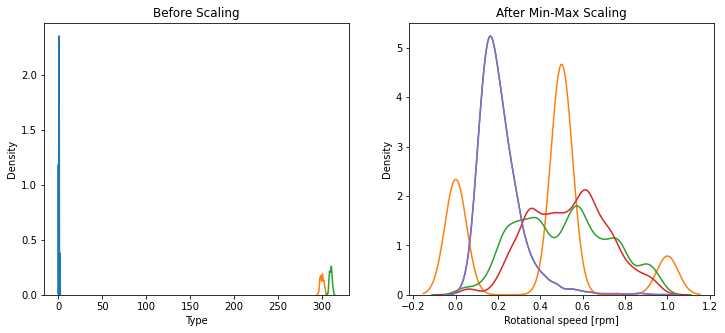

In [133]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))# Se crea una figura con dos gráficas en una misma página 


ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Type'], ax=ax1)
sns.kdeplot(X_train['Air temperature [K]'], ax=ax1)
sns.kdeplot(X_train['Process temperature [K]'], ax=ax1)
sns.kdeplot(X_train_scaled['Rotational speed [rpm]'], ax=ax2)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['Type'], ax=ax2)
sns.kdeplot(X_train_scaled['Air temperature [K]'], ax=ax2)
sns.kdeplot(X_train_scaled['Process temperature [K]'], ax=ax2)
sns.kdeplot(X_train_scaled['Rotational speed [rpm]'], ax=ax2)
plt.show()

In [134]:
print(X_train.shape)
print(y_train.shape)

(7000, 7)
(7000,)


**Interpretación**

Como se puede observar en la gráfica se toma a consideración las características Rotational speed, Torque, Process temperature en donde se puede apreciar que antes de realizar el escalamiento no tenian una buena dispersión. Posterior a ello tras realizar el proceso de MinMax Scaling se puede identificar que la distribución torna en un intervalo de 0 a 1 lo que equivale como un modelo efectivo para la propuesta.

# Naive Bayes

In [135]:
# Instanciamos el algoritmo gauciano de Naive Bayes
gnb = GaussianNB()

In [136]:
# Alimentamos nuestro modelo con los datos de entrenamiento
# y obtenemos la predicción
y_pred_NB = gnb.fit(X_train, y_train.values.ravel()).predict(X_test)

In [137]:
# Mostramos el accuracy del modelo Naive Bayes
print("Accuracy Naive Bayes:", metrics.accuracy_score(y_test, y_pred_NB))

# Modelo de Precision de Naive Bayes
print("Precision Naive Bayes:", metrics.precision_score(y_test, y_pred_NB, average='macro'))

# Modelo de Precision 
print("Recall Naive Bayes:", metrics.recall_score(y_test, y_pred_NB, average='macro'))

Accuracy Naive Bayes: 0.96
Precision Naive Bayes: 0.6711571222644477
Recall Naive Bayes: 0.6094285685560221


# Hidden Markov Model

In [138]:
# Instanciamos el modelo Hidden Markov Model
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = , random_state = 42)

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train)

GaussianHMM(n_components=3, n_iter=50, random_state=42)

In [139]:
# realizamos la prueba de predicción del model
y_pred_HMM = model.predict(X_test)

In [140]:
# Mostramos el accuracy del modelo Hidden Markov Model
print("Accuracy Hidden Markov Model:", metrics.accuracy_score(y_test, y_pred_HMM))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision Markov Model:", metrics.precision_score(y_test, y_pred_HMM, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall Markov Model:", metrics.recall_score(y_test, y_pred_HMM, average='macro'))

Accuracy Hidden Markov Model: 0.302
Precision Markov Model: 0.33317298277894164
Recall Markov Model: 0.13545761545533658


C:\Users\enrik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Fuzzy Logic

In [142]:
X = df[['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
Y = df['Target']

In [143]:
from sklearn.preprocessing import StandardScaler
# Formar objeto de scala para entradas
VariablesEntradaScaler=StandardScaler()

In [144]:
#Aplicación de las variables de entrenamiento
VariablesEntradaFit=VariablesEntradaScaler.fit(X)

In [145]:
#Transformación
X=VariablesEntradaFit.transform(X)

In [146]:
#Aplicación del modelo fuzzy logic con un total de 6 grupos seleccionados
modelo_fuzzy = FCM(n_clusters=6,init=1.7,random_state=0, fuzzifier=2) #Seleccionamos 6 cluster
modelo_fuzzy.fit(X)

In [147]:
#Toma de la variable y_pred
centers = modelo_fuzzy.centers
y_pred_fuzzy = modelo_fuzzy.predict(X)
y_pred_fuzzy

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Evaluación

In [148]:
#Imprimo el accuracy
acc_score_fuzzy = accuracy_score(y, y_pred_fuzzy)
print(acc_score_fuzzy)

0.3105


In [149]:
#Obtengo matriz de confusion 
cm_fuzzy = confusion_matrix(y, y_pred_fuzzy)
print(cm_fuzzy)

[[3068 2240 4334   13    3    3]
 [  82   37  219    1    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]]


<AxesSubplot:>

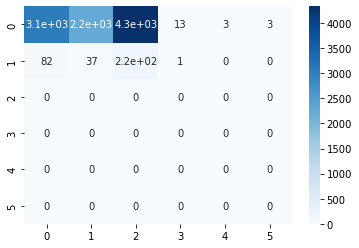

In [150]:
sns.heatmap(confusion_matrix(y, y_pred_fuzzy), annot=True,cmap="Blues")

# Matriz de confusión (Naive Bayes)

In [151]:
#Cramos la matriz de confusión
print(confusion_matrix(y_test, y_pred_NB))

[[2856   41]
 [  79   24]]


<AxesSubplot:>

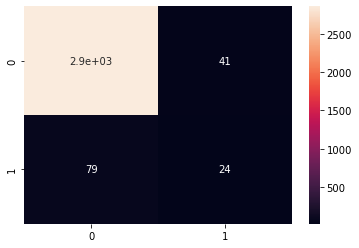

In [152]:
# Presentamos de forma estetica la matriz de confución
sns.heatmap(confusion_matrix(y_test, y_pred_NB), annot=True)

<AxesSubplot:>

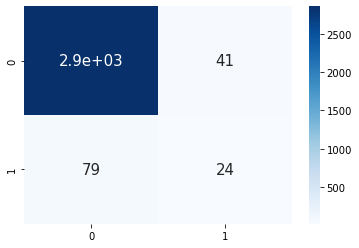

In [153]:
#Imprime la matriz de confusion de manera grafica 
sns.heatmap(confusion_matrix(y_test, y_pred_NB),cmap="Blues", annot=True,annot_kws={"size": 15})

# Matriz de confusión (Hidden Markov Model)


In [154]:
#Cramos la matriz de confusión
print(confusion_matrix(y_test, y_pred_HMM))

[[ 896  483 1518]
 [  19   10   74]
 [   0    0    0]]


<AxesSubplot:>

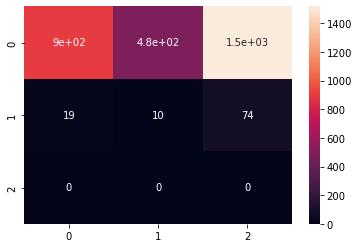

In [155]:
# Presentamos de forma estetica la matriz de confución
sns.heatmap(confusion_matrix(y_test, y_pred_HMM), annot=True)

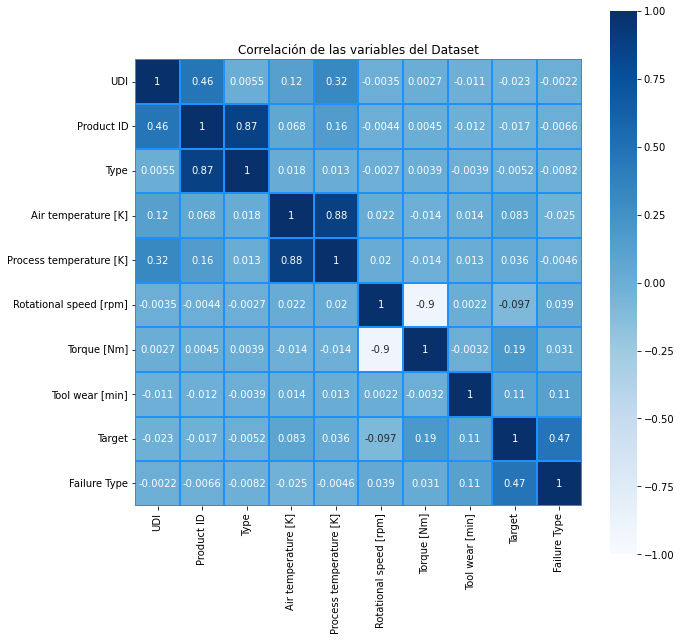

In [89]:
plt.figure(figsize=(10,10))

Correlacion = df1.corr()
sns.heatmap(Correlacion, cmap = 'Blues', linewidths = 0.3, linecolor = 'dodgerblue', annot = True,
            vmin = -1, vmax = 1, cbar_kws = {'orientation':'vertical'}, square = True, cbar = True)
plt.title('Correlación de las variables del Dataset')
plt.show()